Import the necessary libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import math

Section 1.1: Data Generation - Setup

In [136]:
class BasisFunctions(Enum):
    LINEAR = "linear"
    POLYNOMIAL = "polynomial"
    GAUSSIAN = "gaussian"
    SIGMOID = "sigmoid"

class GDMethods(Enum):
    GD = "gd"
    BATCH = "batch"
    SGD = "sgd"
    ANALYTIC = "analytic"

class Linear_Regression:
    """
    Initializes Linear Regression model with configurable basis functions. Assumes 0 initial weights. Note that
    self.weights.shape = (num_features + 1,) due to bias being always linear.

    Args:
        X (numpy.ndarray): list of base, linear features (Nx1)
        y (numpy.ndarray): Targets (Nx1)
        basis_function (BasisFunctions): basis function that gets applied to each feature.
        num_features (int): number of features (if 0, will only have bias)
    """
    def __init__(self, X, y, num_features, basis_function: BasisFunctions):
        self.basis_function = basis_function
        self.num_features = num_features
        self.weights = np.zeros(self.num_features + 1)
        self.X = self.transform_X(X)
        self.y = y
    
    """
    Will transform the X design matrix into a transformed design matrix (capital Phi) by applying the corresponding basis function.
    Returns an N x (num_features + 1) design matrix where the (num_features) rightmost columns have the basis function applied.
    """
    def transform_X(self, X):
        X = X.reshape(-1, 1)
        N = X.shape[0]

        temp = np.ones((N, 1)).reshape(-1, 1)
        match self.basis_function:
            case BasisFunctions.LINEAR: 
                for i in range (1, self.num_features + 1):
                    temp = np.hstack((temp, X))
            case BasisFunctions.POLYNOMIAL:
                for i in range (1, self.num_features + 1):
                    temp = np.hstack((temp, X ** i))
            case BasisFunctions.GAUSSIAN:
                X_max = np.max(X)
                X_min = np.min(X)
                for i in range (1, self.num_features + 1):
                    mean = X_min + (X_max - X_min) * (i - 1) / (self.num_features - 1)
                    exponent = -((X - mean)**2)
                    gaussian = np.exp(exponent)
                    temp = np.hstack((temp, gaussian))
            case BasisFunctions.SIGMOID:
                X_max = np.max(X)
                X_min = np.min(X)
                for i in range (1, self.num_features + 1):
                    mean = X_min + (X_max - X_min) * (i - 1) / (self.num_features - 1)
                    exponent = -(X - mean)
                    sigmoid = 1 / (1 + np.exp(exponent))
                    temp = np.hstack((temp, sigmoid))
        return temp    

    def reset_model(self):
        self.weights = np.zeros(self.num_features + 1)
    
    def plot_bases(self):
        pass

    def plot_model(self, X_data, y_data, show_bases=True, show_true_function=False, **kwargs):
        w = np.asarray(self.weights).reshape(-1)

        x_dense = np.linspace(X_data.min(), X_data.max(), 1000)

        Phi_dense = self.transform_X(x_dense)
        y_hat = Phi_dense @ w

        plt.figure(figsize=(8, 4.5))
        plt.scatter(X_data, y_data, s=18, alpha=0.75, label="data", color="blue")

        if show_bases:
            # Plot each weighted basis (skip bias column 0)
            for j in range(1, Phi_dense.shape[1]):
                plt.plot(x_dense, w[j] * Phi_dense[:, j], linewidth=0.8, alpha=0.4)

        if show_true_function and kwargs.get("true_function"):
            true_function = kwargs.get("true_function")
            plt.plot(x_dense, true_function(x_dense), alpha=0.75, label="true function", color="green")

        plt.plot(x_dense, y_hat, linewidth=2.5, label="model", color="red")

        plt.xlabel("x")
        plt.ylabel("y / basis value")
        plt.title(f"Linear Regression with {self.basis_function.value.capitalize()} bases")
        plt.legend()
        plt.tight_layout()
        plt.show()

    """
    Fits the linear regression model depending on GD method. Different arguments are required depending on method.
    Depending on the method, kwargs contains: epoch, learning_rate, batch_size
    """
    def fit(self, method: GDMethods, **kwargs):
        match method:
            case GDMethods.ANALYTIC:
                self.weights = np.linalg.pinv(self.X.T @ self.X) @ self.X.T @ self.y
            case GDMethods.SGD:
                pass
            case GDMethods.GD:
                pass
            case GDMethods.BATCH:
                pass



    """
    Samples one value from a given function while adding Gaussian noise.

    Args:
        x (float): Input to function
        function (Callable(float, float)): Function to be sampled from.
        std (float): Standard deviation
        seed (int): Defaulted to None, but used for consistent sampling
    
    Returns:
        float: Sampled value from function
    """
    @staticmethod
    def gaussian_noise_sampling(x, function, std=1, seed=None):
        gaussian_sample = np.random.default_rng(seed=seed).normal(loc=0, scale=std, size=1)
        return function(x) + gaussian_sample

    @staticmethod
    def sampler(function, sample_size, x_start, x_end, std=1, seed=None, random=False):
        if random:
            x_values = np.random.default_rng().uniform(low=x_start, high=x_end, size=sample_size)
            x_values = np.sort(x_values)
        else:
            x_values = np.linspace(x_start, x_end, sample_size)
        
        y_values = []
        for i in range(sample_size):
            y_values.append(Linear_Regression.gaussian_noise_sampling(x_values[i], function, std, seed)[0])
        
        y_values = np.array(y_values)

        return {"x": x_values, "y": y_values}
    
    @staticmethod
    def assignment_function(x):
        return (np.log(x) + 1) * np.cos(x) + np.sin(2 * x)

    @staticmethod
    def random_test_function(x):
        return x * np.cos(x) + x * x




Section 1.1: Data Generation - Mock data

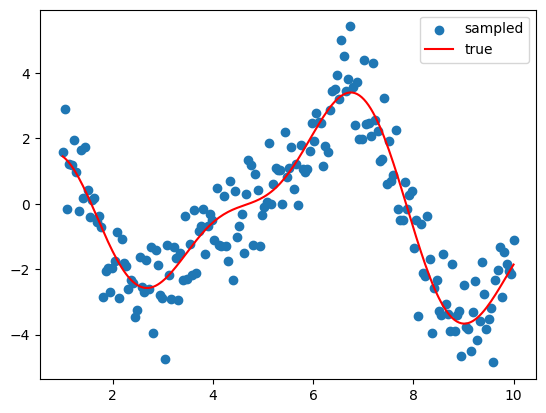

In [142]:
data = Linear_Regression.sampler(Linear_Regression.assignment_function, 200, 1, 10, random=False)
x = data.get("x")
y = data.get("y")

plt.scatter(x, y, label="sampled")
plt.plot(x, Linear_Regression.assignment_function(x), label="true", color='red')
plt.legend()
plt.show()

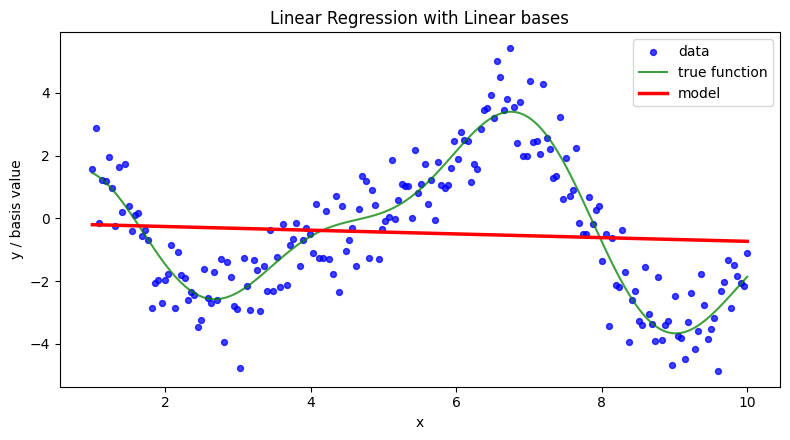

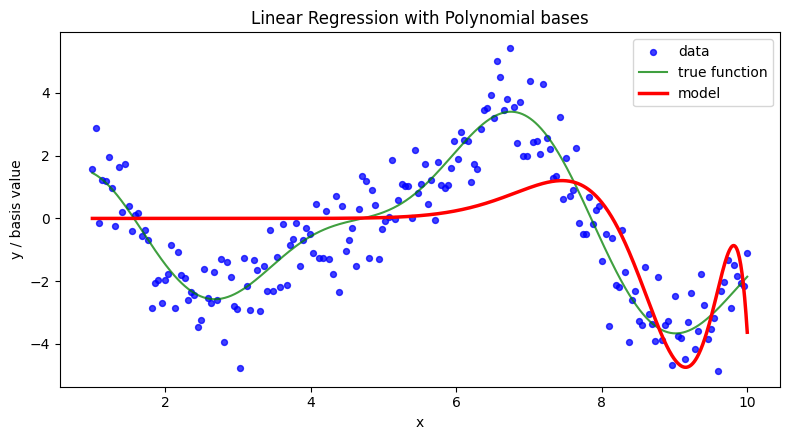

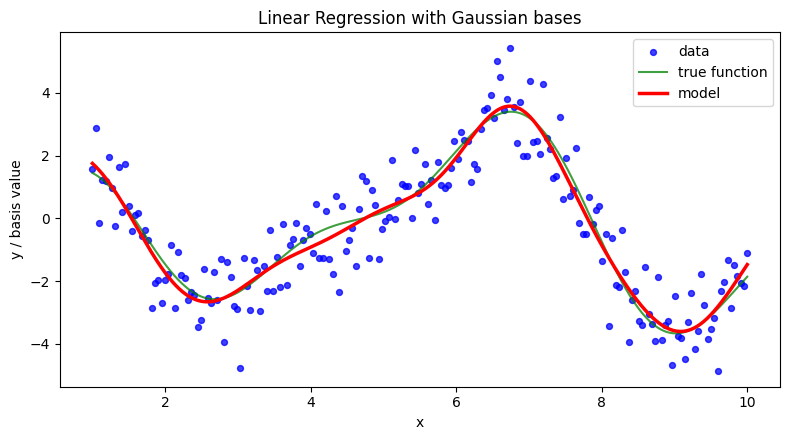

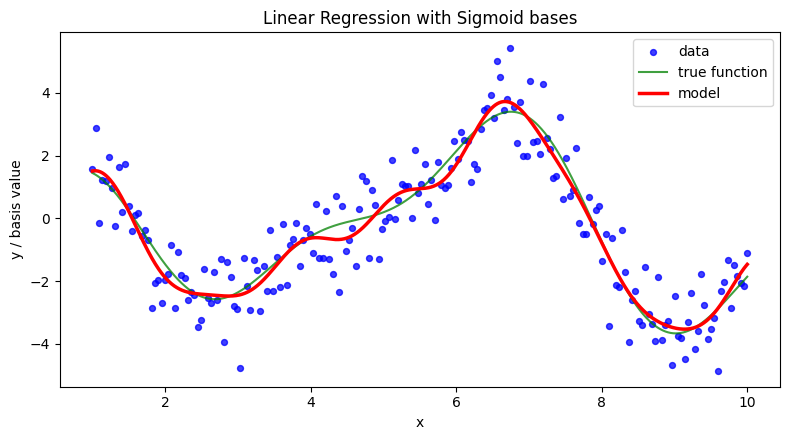

In [144]:
linear_model = Linear_Regression(x, y, 20, basis_function=BasisFunctions.LINEAR)
polynomial_model = Linear_Regression(x, y, 20, basis_function=BasisFunctions.POLYNOMIAL)
gaussian_model = Linear_Regression(x, y, 12, basis_function=BasisFunctions.GAUSSIAN)
sigmoid_model = Linear_Regression(x, y, 20, basis_function=BasisFunctions.SIGMOID)

linear_model.fit(GDMethods.ANALYTIC)
polynomial_model.fit(GDMethods.ANALYTIC)
gaussian_model.fit(GDMethods.ANALYTIC)
sigmoid_model.fit(GDMethods.ANALYTIC)

linear_model.plot_model(x, y, show_bases=False, show_true_function=True, true_function=Linear_Regression.assignment_function)
polynomial_model.plot_model(x, y, show_bases=False, show_true_function=True, true_function=Linear_Regression.assignment_function)
gaussian_model.plot_model(x, y, show_bases=False, show_true_function=True, true_function=Linear_Regression.assignment_function)
sigmoid_model.plot_model(x, y, show_bases=False, show_true_function=True, true_function=Linear_Regression.assignment_function)